In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Facebook Analysis

In [ ]:
df = pd.read_excel("/content/facebook data post elections.xlsx")
df.head()

,facebookUrl,postId,pageName,url,time,timestamp,user,collaborators,text,likes,...,timeCreated,timestampCreated,sharedPost,link,error,errorDescription,previewTitle,previewDescription,previewSource,previewTarget
0,https://www.facebook.com/share/16QdiUtmAL/,1.441846e+15,Kachapizo,https://www.facebook.com/Kachapizo/posts/pfbid...,2026-01-17T21:24:15.000Z,1.768685e+09,"{'id': '100044455873346', 'name': 'Leila kalan...",[],Naye mwana!,6266.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.facebook.com/share/16QdiUtmAL/,1.437974e+15,Kachapizo,https://www.facebook.com/Kachapizo/posts/pfbid...,2026-01-12T17:20:14.000Z,1.768238e+09,"{'id': '100044455873346', 'name': 'Leila kalan...",[],Oba onfuna✍️,2576.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.facebook.com/share/16QdiUtmAL/,1.436588e+15,Kachapizo,https://www.facebook.com/reel/1417158703112317/,2026-01-10T17:26:40.000Z,1.768066e+09,"{'id': '100044455873346', 'name': 'Leila kalan...",[],Lwaki Buli Muntu Ampalana😂🤣😭,2358.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.facebook.com/share/16QdiUtmAL/,1.434947e+15,Kachapizo,https://www.facebook.com/reel/4220421828224182/,2026-01-08T15:00:05.000Z,1.767884e+09,"{'id': '100044455873346', 'name': 'Leila kalan...",[],"Banange Ba OB, don't over know us please! 🤣😂\n...",4799.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.facebook.com/share/16QdiUtmAL/,1.432674e+15,Kachapizo,https://www.facebook.com/Kachapizo/posts/pfbid...,2026-01-05T10:20:34.000Z,1.767608e+09,"{'id': '100044455873346', 'name': 'Leila kalan...",[],Yiiyi 😩,708.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['facebookUrl', 'postId', 'pageName', 'url', 'time', 'timestamp', 'user',
       'collaborators', 'text', 'likes', 'comments', 'shares',
       'topReactionsCount', 'media', 'feedbackId', 'reactionLikeCount',
       'reactionSadCount', 'reactionHahaCount', 'reactionAngryCount',
       'reactionCareCount', 'reactionLoveCount', 'reactionWowCount',
       'topLevelUrl', 'facebookId', 'pageAdLibrary', 'inputUrl', 'isVideo',
       'viewsCount', 'textReferences', 'timeCreated', 'timestampCreated',
       'sharedPost', 'link', 'error', 'errorDescription', 'previewTitle',
       'previewDescription', 'previewSource', 'previewTarget'],
      dtype='object')

In [ ]:
import ast

def extract_name(value):
    # Check if the value is a string and not empty/null
    if pd.isna(value) or not isinstance(value, str):
        return None
    try:
        # Convert string to dict and get name
        return ast.literal_eval(value).get('name')
    except (ValueError, SyntaxError):
        # Handles cases where the string might be malformed
        return None

df['author name'] = df['user'].apply(extract_name)

In [ ]:
all_authors = df['author name'].unique()
print(all_authors)

['Leila kalanzi Kachapizo' 'Silent Majority Ug Official' 'Mozey Moz'
 'Doreen Kajumba' 'Mr.wilber ug' None 'Bukenya Moses Wyza' 'High tower'
 'Eye witnesser' 'Uganda Empya' 'Robert Ug' 'Kamukama'
 'Mutebi Farouk Blaqman' 'Shafik Channel' 'Mat Tee Blogger' 'Owomukisa Tv'
 'Brian Uganda' 'Kato Ignatius Nyansio' 'Basajjamivule Official'
 'Ghetto Tv' 'Brian Ssemanda' 'Harimah Smart Hajjati' 'Dr. Daniel Kawuma'
 'Black Media Tv' 'David Sserukenya' 'Kunde Gadaffi' 'news flash vbloger'
 'Sama Uganda Media' 'Bolingo 256' 'KJ Bruce' 'Eng. Asiimwe Jonard'
 'Fik Yoo' 'Media House' 'Klyx Dean' 'Avata Promota Ug' 'Volongoto'
 'paul musisi media. ' 'facts ug' 'Centenary Radio 88.1 Fm' 'Henry Chemba'
 'Power_Brainz_official' 'Nansana tv' 'Bukenya Nelson Page' 'KFD MEDIA UG'
 'Konde Awori Bashir' '256 Celebrity Music/News' 'Owori Gagamel'
 'Richard Nyombi' 'Nalubega Mariam Seguya' 'Emily Smith UK'
 'Aine Kaguta Godfrey Sodo' 'Mawejje TV' 'Judith Nalukwago'
 'Emboozi teba nkadde' 'MR MOSH LIVE' 'Esther

In [ ]:
df['date'] = pd.to_datetime(pd.to_numeric(df['timestamp'], errors='coerce'), unit='s')
df['date']

,date
0,2026-01-17 21:24:15
1,2026-01-12 17:20:14
2,2026-01-10 17:26:40
3,2026-01-08 15:00:05
4,2026-01-05 10:20:34
...,...
9145,2025-12-27 19:43:54
9146,2025-12-27 15:53:04
9147,2025-12-27 15:29:16
9148,2025-12-27 15:10:57


## Posts Distribution over time

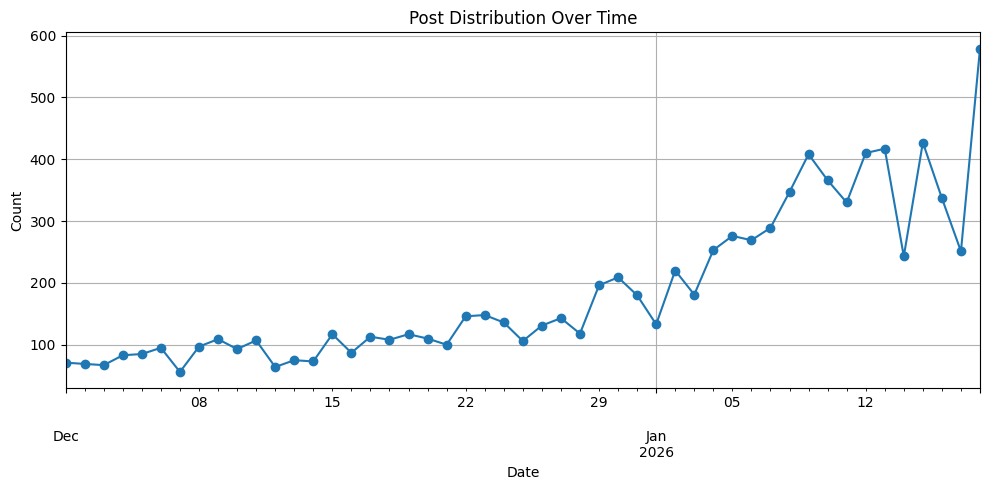

In [ ]:
daily_counts = df.set_index('date').resample('D').size()

# 2. Plot the results
plt.figure(figsize=(10, 5))
daily_counts.plot(kind='line', marker='o')

plt.title('Post Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

## Who are the most active participants in election-related conversations?


author name
Ghetto Tv              400
Kamukama               400
KFD MEDIA UG           200
Emboozi teba nkadde    200
Mr.wilber ug           200
Mozey Moz              200
Shafik Channel         200
Owomukisa Tv           200
Uganda Empya           200
Doreen Kajumba         200
Name: count, dtype: int64


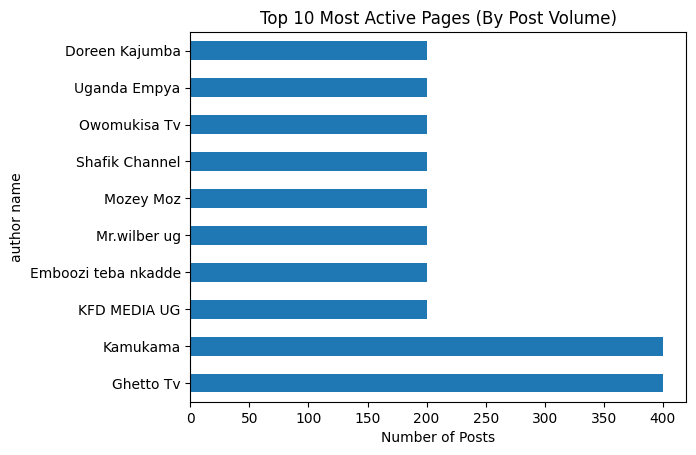

In [ ]:
# Count the number of posts per page/user
top_posters = df['author name'].value_counts().head(10)

print(top_posters)

# Visualization
top_posters.plot(kind='barh', title='Top 10 Most Active Pages (By Post Volume)')
plt.xlabel('Number of Posts')
plt.show()

## By Engagement (Impact)

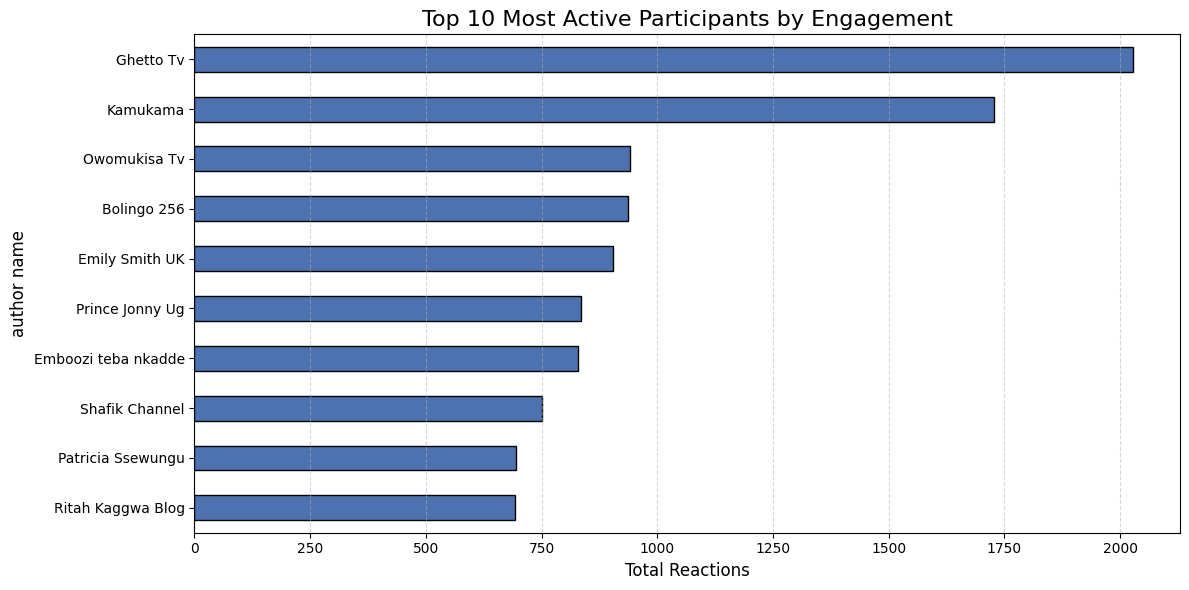

In [ ]:
plt.figure(figsize=(12, 6))

metrics = ['likes', 'shares', 'topReactionsCount']
df[metrics] = df[metrics].apply(pd.to_numeric, errors='coerce').fillna(0)

top_engaged = df.groupby('author name')[metrics].sum()

top_10_engaged = top_engaged.sort_values(by='topReactionsCount', ascending=False).head(10)

top_10_engaged['topReactionsCount'].sort_values(ascending=True).plot(
    kind='barh',
    color='#4c72b0',
    edgecolor='black'
)

plt.title('Top 10 Most Active Participants by Engagement', fontsize=16)
plt.xlabel('Total Reactions', fontsize=12)
plt.ylabel('author name', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()

## percentage coverage of the top authors

In [ ]:
metrics = ['likes', 'shares', 'topReactionsCount']
df[metrics] = df[metrics].apply(pd.to_numeric, errors='coerce').fillna(0)

# Total engagement per post
df['total_engagement'] = df[metrics].sum(axis=1)


In [ ]:
df['total_engagement']

,total_engagement
0,6284.0
1,2629.0
2,2371.0
3,4857.0
4,719.0
...,...
9145,7640.0
9146,463.0
9147,361.0
9148,792.0


In [ ]:
author_engagement = (
    df.groupby('author name')['total_engagement']
      .sum()
      .sort_values(ascending=False)
)
author_engagement

,total_engagement
author name,
Ghetto Tv,1181342.0
Owomukisa Tv,890060.0
Shafik Channel,468538.0
Bolingo 256,414305.0
Sama Uganda Media,323769.0
...,...
news flash vbloger,516.0
Power_Brainz_official,426.0
Eng. Asiimwe Jonard,190.0


In [ ]:
top20_engagement = author_engagement.head(10).sum()
rest_engagement = author_engagement.iloc[10:].sum()

In [ ]:
impact_dist = pd.DataFrame({
    'Group': ['Top 20 Authors', 'All Other Authors'],
    'Engagement': [top20_engagement, rest_engagement]
})
impact_dist

,Group,Engagement
0,Top 20 Authors,4513236.0
1,All Other Authors,1791839.0


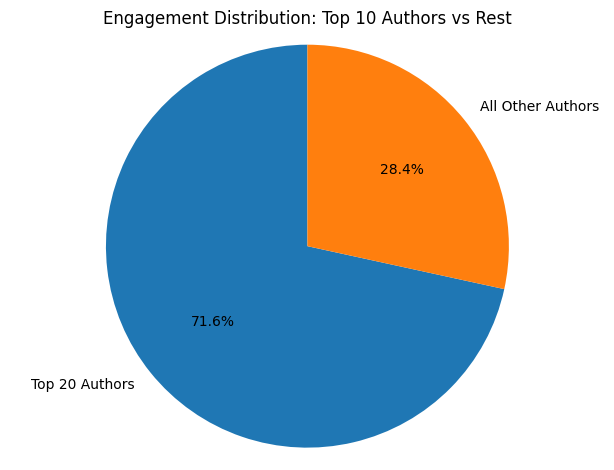

In [ ]:
plt.figure()
plt.pie(
    impact_dist['Engagement'],
    labels=impact_dist['Group'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Engagement Distribution: Top 10 Authors vs Rest')
plt.axis('equal')  # keeps pie circular
plt.tight_layout()

## Comparison of engagement through likes, comments and shares

<Figure size 1200x800 with 0 Axes>

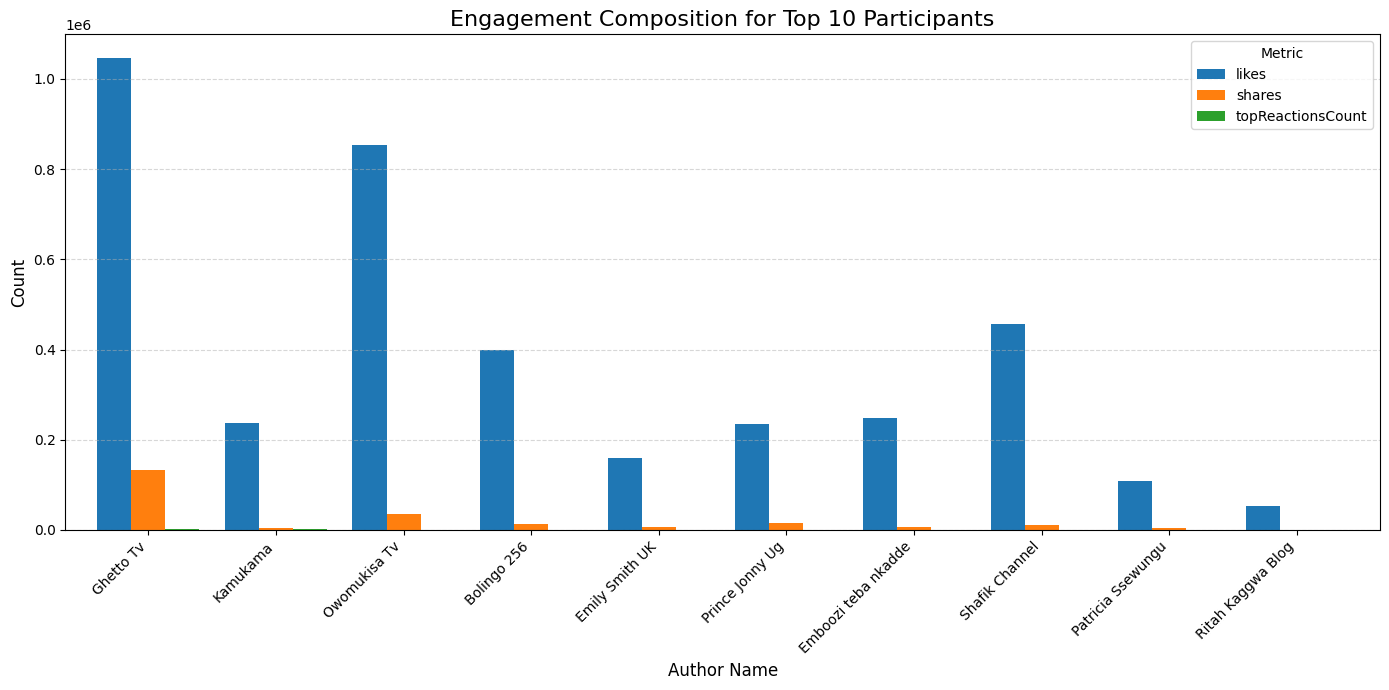

In [ ]:
# 1. Setup the figure
plt.figure(figsize=(12, 8))

# 2. Plot all metrics in the dataframe
top_10_engaged.plot(
    kind='bar',
    width=0.8,
    figsize=(14, 7),
    color=['#1f77b4', '#ff7f0e', '#2ca02c'] # Blue (likes), Orange (shares), Green (reactions)
)

# 3. Formatting
plt.title('Engagement Composition for Top 10 Participants', fontsize=16)
plt.xlabel('Author Name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate names so they don't overlap
plt.legend(title='Metric')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## Engagement Overtime

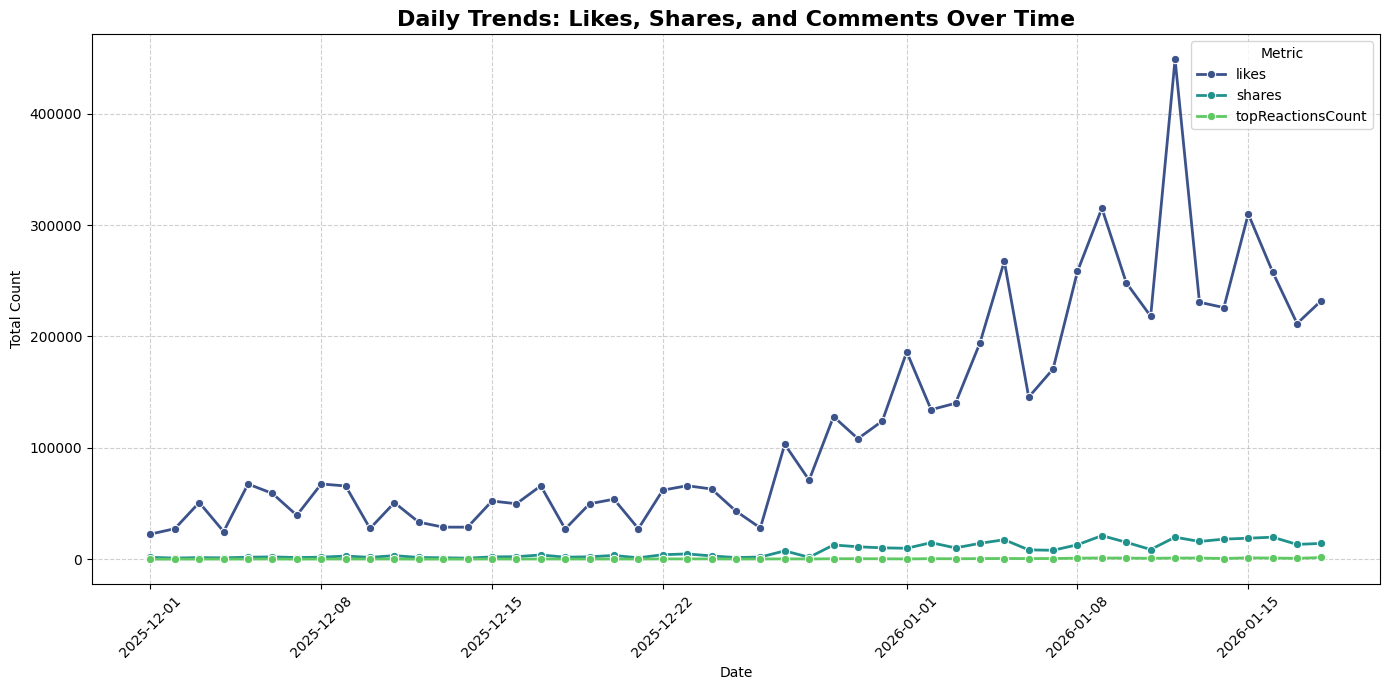

In [ ]:
df['date_only'] = df['date'].dt.date
daily_engagement = df.groupby('date_only')[metrics].sum().reset_index()

engagement_melted = daily_engagement.melt(
    id_vars='date_only',
    value_vars=metrics,
    var_name='Engagement Type',
    value_name='Count'
)

plt.figure(figsize=(14, 7))

# Plot trends
sns.lineplot(
    data=engagement_melted,
    x='date_only',
    y='Count',
    hue='Engagement Type',
    marker='o',
    linewidth=2,
    palette='viridis'
)

plt.title('Daily Trends: Likes, Shares, and Comments Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Total Count')
plt.legend(title='Metric')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)

plt.tight_layout()

## Which types of posts (text, images, videos, links) attract the highest engagement?


In [ ]:
df['isVideo'].values

array([nan, nan,  1., ...,  1.,  1.,  1.])

Average Engagement by Type:
post_type
Video    206.378995
Image     77.227256
Text      77.226804
Link       6.318862
Name: total_engagement, dtype: float64


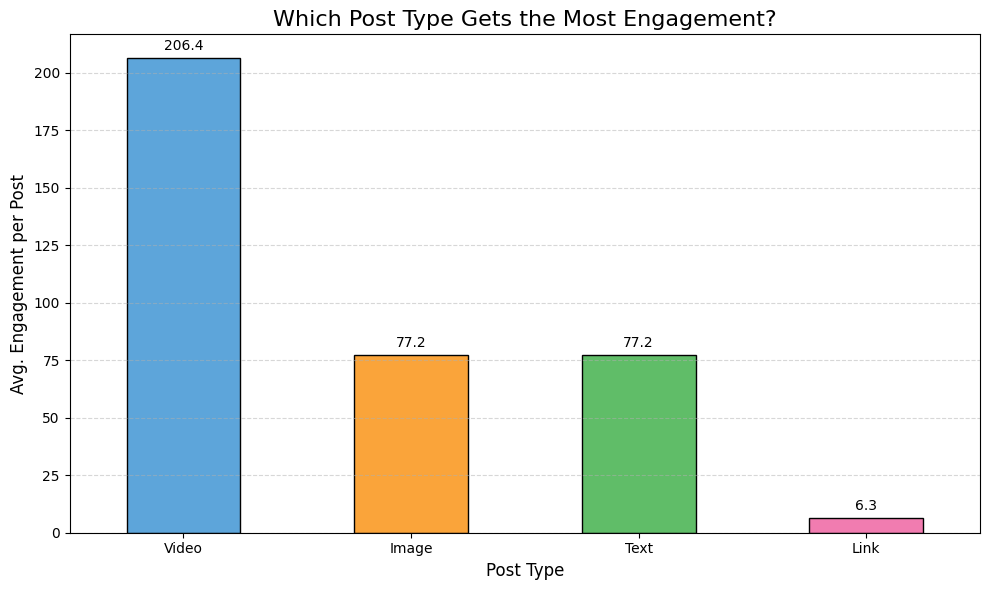

In [ ]:
# categorization function
def categorize_post(row):
    if row.get('isVideo') == 1:
        return 'Video'

    # Check Image: ensure 'media' is not null, not empty list, not empty string
    val_media = row.get('media')
    if val_media is not None and val_media != [] and val_media != "" and not pd.isna(val_media):
        return 'Image'

    # Check Link: look for link url or shared post
    if pd.notna(row.get('link')) or pd.notna(row.get('sharedPost')):
        return 'Link'

    # Fallback
    return 'Text'

# Apply the category
df['post_type'] = df.apply(categorize_post, axis=1)

# Clean Engagement Metrics
metrics = ['likes', 'shares', 'topReactionsCount', 'comments']
for m in metrics:
    # Coerce errors to NaN, then fill with 0
    df[m] = pd.to_numeric(df[m], errors='coerce').fillna(0)

# Calculate Total Engagement per post
df['total_engagement'] = df['topReactionsCount'] + df['shares'] + df['comments']

# Group by Post Type and calculate the MEAN (Average) engagement
engagement_summary = df.groupby('post_type')['total_engagement'].mean().sort_values(ascending=False)

print("Average Engagement by Type:")
print(engagement_summary)

plt.figure(figsize=(10, 6))
ax = engagement_summary.plot(kind='bar', color=['#5da5da', '#faa43a', '#60bd68', '#f17cb0'], edgecolor='black')

plt.title('Which Post Type Gets the Most Engagement?', fontsize=16)
plt.ylabel('Avg. Engagement per Post', fontsize=12)
plt.xlabel('Post Type', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.tight_layout()

## What are the dominant themes and narratives in election-related discussions?

In [ ]:
import re

In [ ]:
def extract_hashtags(text):
    if pd.isna(text):
        return []
    # Regex to find words starting with #
    return re.findall(r"#(\w+)", str(text).lower())

# Apply extraction
df['hashtags'] = df['text'].apply(extract_hashtags)

/tmp/ipython-input-2239487096.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0, 0.5, '')

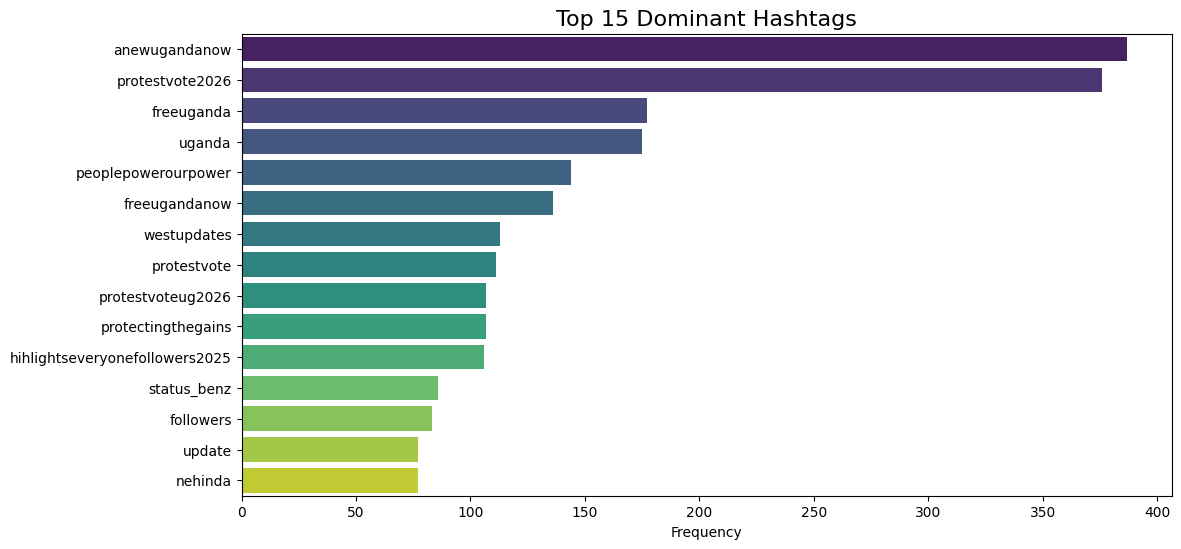

In [ ]:
# Explode hashtags
all_hashtags = df['hashtags'].explode().dropna()

# Hashtags to exclude
exclude_tags = {
    "newsflashvbloger",
    "kangaboproperty",
    "worldwide",
    "cameroon",
    "zimbabwe",
    "highlightseveryone",
    "southafrica",
    "highlights2025",
    "goviralchallenge",
    "trending",
    "wordwide",
    "goodvibes",
    "mozambique",
    "malawi",
    "trendingreel"
}

# Filter out unwanted hashtags
all_hashtags = all_hashtags[~all_hashtags.isin(exclude_tags)]

# Count frequencies
hashtag_counts = all_hashtags.value_counts().head(15)

# Plot Top 15 Hashtags
plt.figure(figsize=(12, 6))
sns.barplot(
    x=hashtag_counts.values,
    y=hashtag_counts.index,
    palette='viridis'
)
plt.title('Top 15 Dominant Hashtags', fontsize=16)
plt.xlabel('Frequency')
plt.ylabel('')

## hashtags usage over time

<Figure size 1200x600 with 0 Axes>

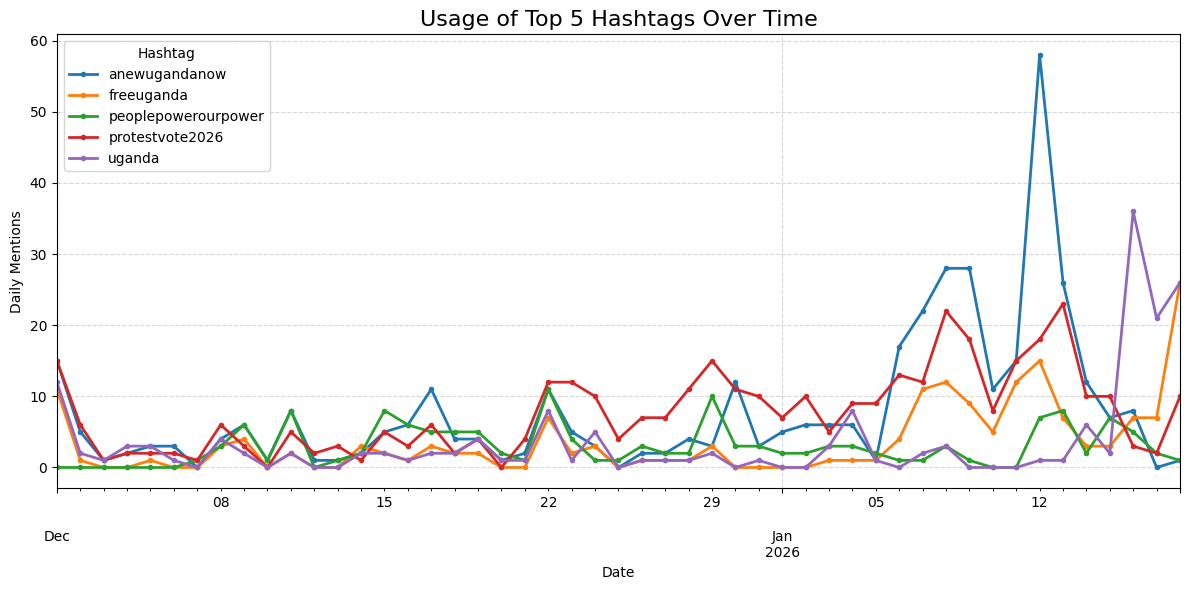

In [ ]:
# Create a temporary DataFrame for time-series analysis
df_tags = df[['date', 'hashtags']].explode('hashtags').dropna()

# remove the hashtags to exclude
df_tags = df_tags[~df_tags['hashtags'].isin(exclude_tags)]

# Identify the top 5 specific hashtags to track
top_5_tags = hashtag_counts.head(5).index.tolist()

# Filter for only the top 5 tags
df_tags_top = df_tags[df_tags['hashtags'].isin(top_5_tags)]

# Group by Date and Hashtag to count daily usage
tag_trends = df_tags_top.groupby(['date', 'hashtags']).size().unstack(fill_value=0)

# Resample to Daily (or Weekly 'W') to smooth the lines
tag_trends = tag_trends.resample('D').sum()

# Plot
plt.figure(figsize=(12, 6))
tag_trends.plot(kind='line', marker='.', linewidth=2, figsize=(12, 6))
plt.title('Usage of Top 5 Hashtags Over Time', fontsize=16)
plt.ylabel('Daily Mentions')
plt.xlabel('Date')
plt.legend(title='Hashtag')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

## themes

/tmp/ipython-input-1829319314.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


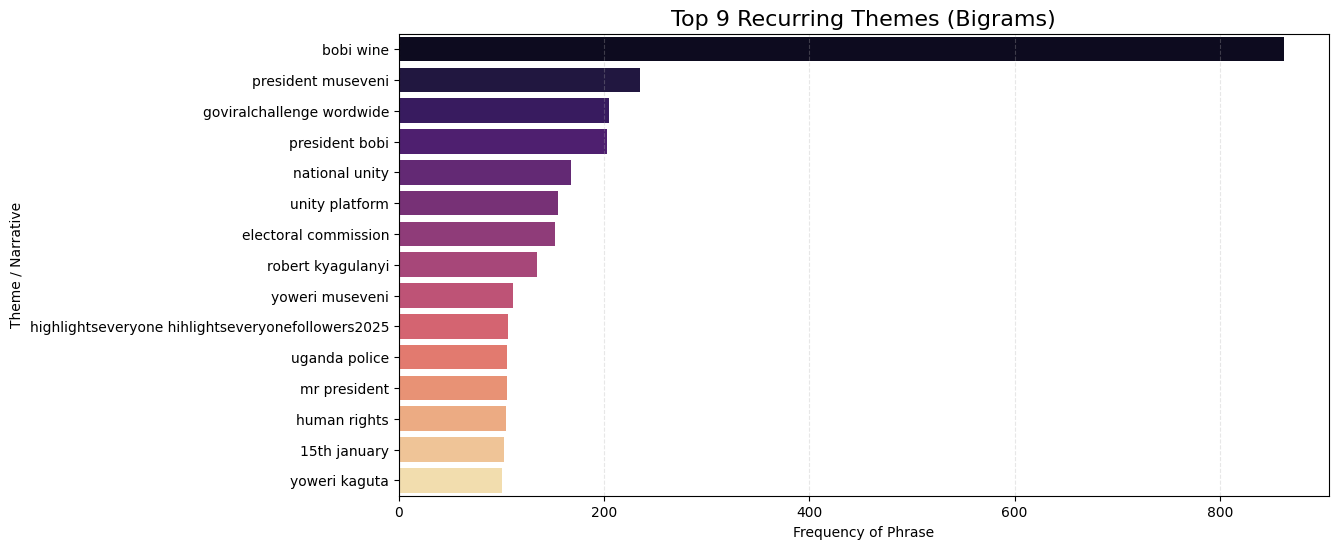

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# 1. Clean text
clean_text = df['text'].dropna().astype(str)

# 2. Bigram vectorizer
vec = CountVectorizer(
    ngram_range=(2, 2),
    stop_words='english',
    max_features=30  # slightly higher to compensate for removals
)
bow = vec.fit_transform(clean_text)

# 3. Sum counts
sum_words = bow.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# 4. DataFrame
df_themes = pd.DataFrame(words_freq, columns=['Phrase', 'Count'])

# Phrases to exclude
exclude_phrases = {
    "taboolasponsored links",
    "wordwide cameroon",
    "southafrica cameroon",
    "south africa",
    "cameroon southafrica",
    "highlights2025 highlightseveryone",
    "highlightseveryone newsflashbloger",
    "blood pressure",
    "secret healthy",
    "healthy blood",
    "blood vessels",
    "use simple",
    "vessels use",
    "southafrica zimbabwe",
    "simple tips",
    "tips learn",
    "learn effective",
    "effective method",
    "method blood",
    "pressure tips",
    "tips taboolasponsored",
    "highlightseveryone newsflashvbloger",
    "novelodge taboolasponsored"
}

# 5. Filter out unwanted themes
df_themes = df_themes[~df_themes['Phrase'].isin(exclude_phrases)]

# 6. Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Count',
    y='Phrase',
    data=df_themes.head(15),
    palette='magma'
)
plt.title('Top 9 Recurring Themes (Bigrams)', fontsize=16)
plt.xlabel('Frequency of Phrase')
plt.ylabel('Theme / Narrative')
plt.grid(axis='x', linestyle='--', alpha=0.3)

In [ ]:
df_themes.head(15)

,Phrase,Count
0,bobi wine,863
2,president museveni,235
3,goviralchallenge wordwide,205
4,president bobi,203
6,national unity,168
7,unity platform,155
8,electoral commission,152
10,robert kyagulanyi,135
11,yoweri museveni,111
12,highlightseveryone hihlightseveryonefollowers2025,106


### Tri grams

/tmp/ipython-input-2765672721.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Phrase', data=df_themes.head(15), palette='magma')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


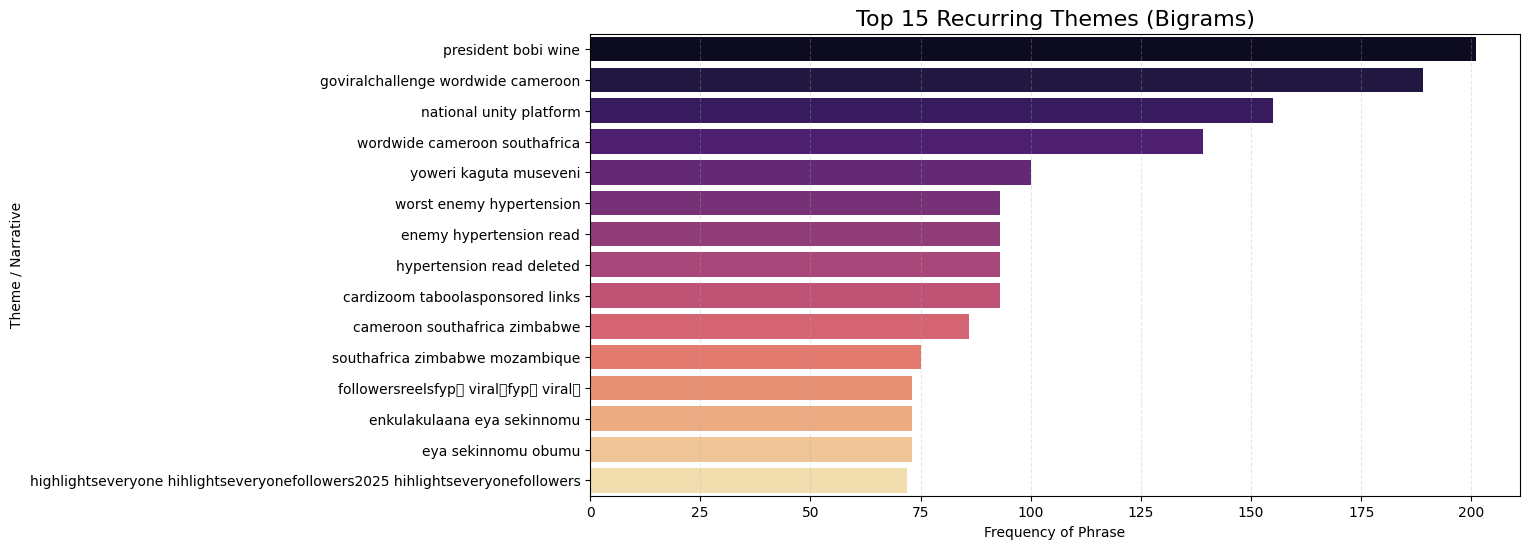

In [ ]:

clean_text = df['text'].dropna().astype(str)

# 2. Use CountVectorizer to find frequent 3-word phrases (Trigrams)
vec = CountVectorizer(ngram_range=(3, 3), stop_words='english', max_features=20)
bow = vec.fit_transform(clean_text)

# 3. Sum up the counts
sum_words = bow.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# 4. Convert to DataFrame for plotting
df_themes = pd.DataFrame(words_freq, columns=['Phrase', 'Count'])

# 5. Plot Top Themes
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Phrase', data=df_themes.head(15), palette='magma')
plt.title('Top 15 Recurring Themes (Bigrams)', fontsize=16)
plt.xlabel('Frequency of Phrase')
plt.ylabel('Theme / Narrative')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.show()

## Analysis on political party mention

In [ ]:

party_keywords = {
    'NUP': [r'\bnup\b', r'\bbobi wine\b', r'\bbobi\b'],
    'NRM': [r'\bnrm\b', r'\byoweri\b', r'\bmuseveni\b', r'\bsevo\b'],
    'FDC': [r'\bfdc\b', r'\bbesigye\b'],
    'PDP': [r'\bpdp\b'],
    'DP':  [r'\bdp\b']
}

# 2. Function to check mentions
def check_party_mention(text, patterns):
    if pd.isna(text):
        return 0
    text_lower = str(text).lower()
    for pattern in patterns:
        if re.search(pattern, text_lower):
            return 1
    return 0

# 3. Apply the function to create a column for each party
for party, patterns in party_keywords.items():
    df[f'mention_{party}'] = df['text'].apply(lambda x: check_party_mention(x, patterns))

# 4. Aggregate Data for Analysis
party_stats = []

for party in party_keywords.keys():
    # Filter rows where this party was mentioned
    party_data = df[df[f'mention_{party}'] == 1]

    # Calculate stats
    count = len(party_data)
    # Average engagement (ensure metrics are numeric first)
    avg_eng = party_data['total_engagement'].mean() if count > 0 else 0

    party_stats.append({
        'Party': party,
        'Post_Volume': count,
        'Avg_Engagement': avg_eng
    })

stats_df = pd.DataFrame(party_stats).sort_values(by='Post_Volume', ascending=False)
print(stats_df)

  Party  Post_Volume  Avg_Engagement
0   NUP         1164      306.977663
1   NRM          960       67.992708
2   FDC           62      293.145161
4    DP            7       40.000000
3   PDP            3        8.000000


# Are the discussion personality focussed or not?

/tmp/ipython-input-4261227726.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


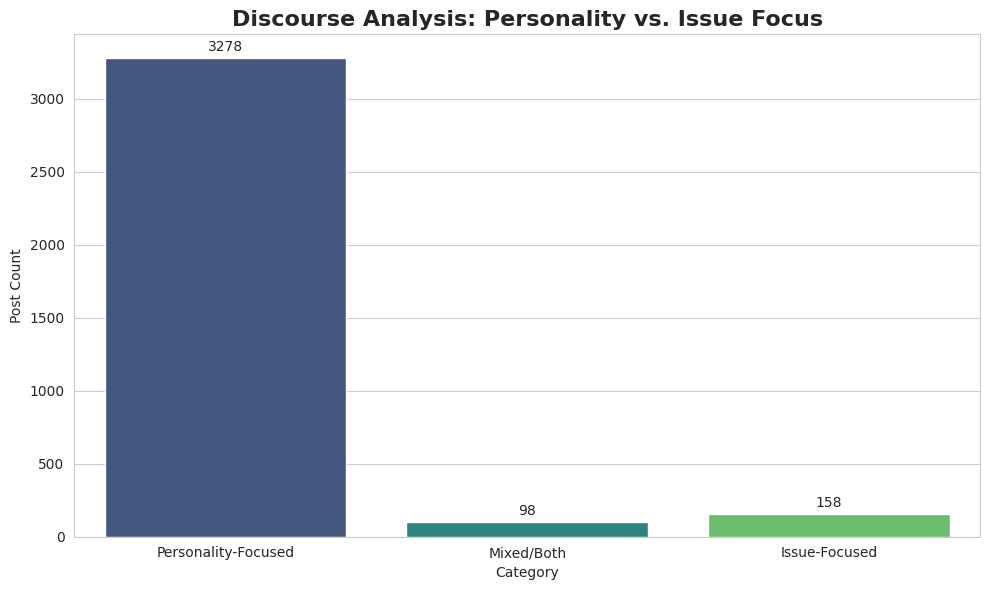

/tmp/ipython-input-4261227726.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Hashtag', x='Count', data=top_hashtags, palette='magma')


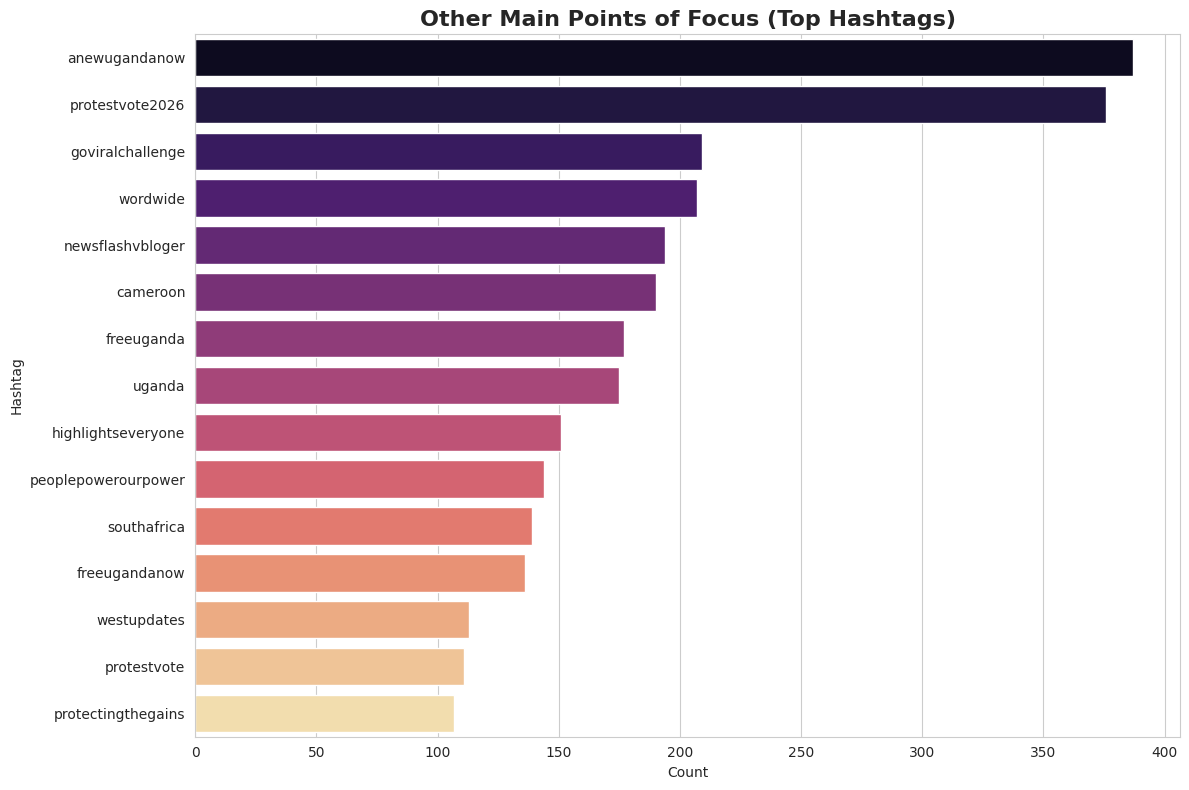

Focus Distribution (%):
focus_category
Personality-Focused    92.756084
Issue-Focused           4.470855
Mixed/Both              2.773062
Name: proportion, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from wordcloud import WordCloud, STOPWORDS


# 1. DEFINE KEYWORDS
personality_keywords = [
    'bobi wine', 'museveni', 'president', 'leader', 'h.e', 'candidate',
    'vote', 'strong', 'honest', 'character', 'dictator', 'father', 'mother',
    'family', 'who', 'him', 'her', 'personality', 'celebrate', 'message', 'besigye'
]

issue_keywords = [
    'economy', 'jobs', 'inflation', 'tax', 'health', 'hospital', 'education',
    'school', 'roads', 'infrastructure', 'security', 'crime', 'rights',
    'freedom', 'corruption', 'policy', 'reform', 'budget', 'debt', 'prices'
]

# 2. PROCESSING FUNCTIONS
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text.lower()

def classify_focus(text):
    text = clean_text(text)
    p_score = sum(1 for word in personality_keywords if word in text)
    i_score = sum(1 for word in issue_keywords if word in text)

    if p_score > i_score:
        return 'Personality-Focused'
    elif i_score > p_score:
        return 'Issue-Focused'
    elif p_score > 0 and i_score > 0:
        return 'Mixed/Both'
    else:
        return 'Other/General'

# 3. APPLY LOGIC
if 'text' in df.columns:
    df['clean_text'] = df['text'].apply(clean_text)
    df['focus_category'] = df['text'].apply(classify_focus)
    df['extracted_hashtags'] = df['text'].apply(lambda x: re.findall(r"#(\w+)", str(x).lower()))

# 4. VISUALIZATION 1: FOCUS COMPARISON
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

focus_data = df[df['focus_category'].isin(['Personality-Focused', 'Issue-Focused', 'Mixed/Both'])]

ax = sns.countplot(
    x='focus_category',
    data=focus_data,
    palette='viridis',
    order=['Personality-Focused', 'Mixed/Both', 'Issue-Focused']
)
plt.title('Discourse Analysis: Personality vs. Issue Focus', fontsize=16, fontweight='bold')
plt.ylabel('Post Count')
plt.xlabel('Category')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

# 5. VISUALIZATION 2: OTHER MAIN POINTS (HASHTAGS)
all_hashtags = [tag for tags in df['extracted_hashtags'] for tag in tags]
hashtag_counts = Counter(all_hashtags)
top_hashtags = pd.DataFrame(hashtag_counts.most_common(15), columns=['Hashtag', 'Count'])

plt.figure(figsize=(12, 8))
sns.barplot(y='Hashtag', x='Count', data=top_hashtags, palette='magma')
plt.title('Other Main Points of Focus (Top Hashtags)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 7. RESULTS
print("Focus Distribution (%):")
print(focus_data['focus_category'].value_counts(normalize=True) * 100)

In [ ]:
text = df['text'].dropna().astype(str).str.lower()

pattern = '|'.join(map(re.escape, exclude_phrases))
text = text.str.replace(pattern, ' ', regex=True)

clean_text = ' '.join(text)

stopwords = set(STOPWORDS)
stopwords.update({'amp', 'rt', 'https', 'co', 'said', 's', 'newsflashvblogger', 'u'})

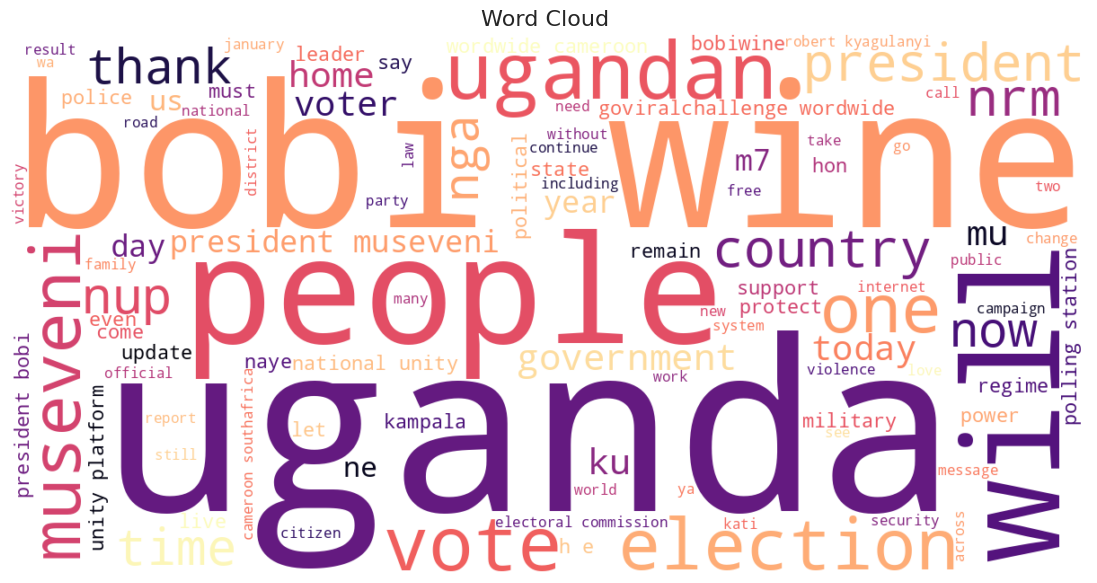

In [ ]:
wc = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    colormap='magma',
    stopwords=stopwords,
    max_words=100
).generate(clean_text)

plt.figure(figsize=(14, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud ', fontsize=16)
plt.show()

## Number of mentions per party




/tmp/ipython-input-551224021.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-551224021.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


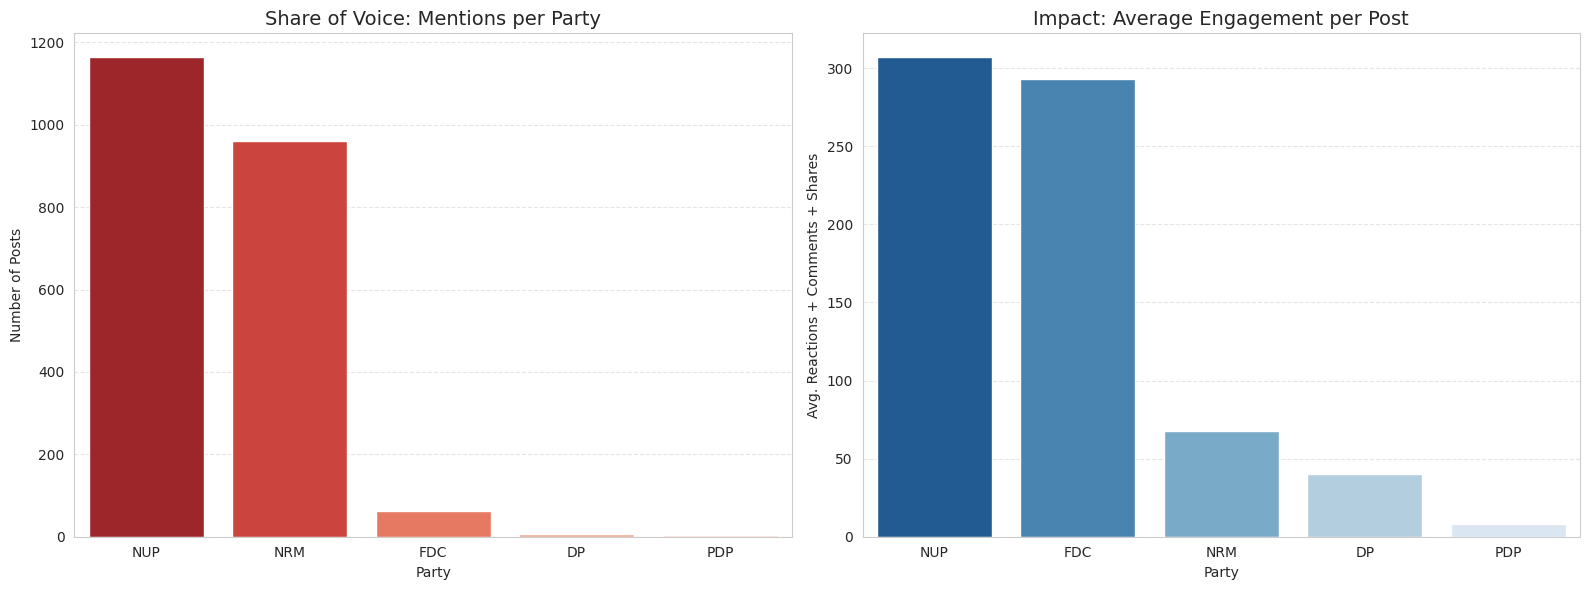

In [ ]:
# Create a figure with two subplots (side-by-side)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: Share of Voice (Volume) ---
sns.barplot(
    data=stats_df,
    x='Party',
    y='Post_Volume',
    ax=axes[0],
    palette='Reds_r' # Red theme (adjust as needed)
)
axes[0].set_title('Share of Voice: Mentions per Party', fontsize=14)
axes[0].set_ylabel('Number of Posts')
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# --- Plot 2: Impact (Average Engagement) ---
# Re-sort by engagement for the second chart so the highest impact is first
stats_df_eng = stats_df.sort_values(by='Avg_Engagement', ascending=False)

sns.barplot(
    data=stats_df_eng,
    x='Party',
    y='Avg_Engagement',
    ax=axes[1],
    palette='Blues_r'
)
axes[1].set_title('Impact: Average Engagement per Post', fontsize=14)
axes[1].set_ylabel('Avg. Reactions + Comments + Shares')
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## Political party Engagement overtime




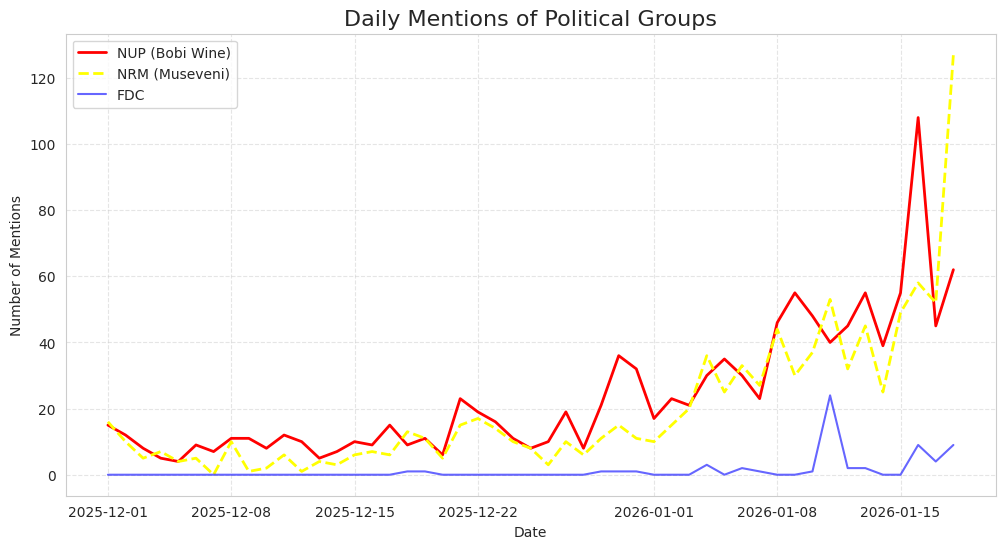

In [ ]:
# Select the party columns + date
df_time = df[['date', 'mention_NUP', 'mention_NRM', 'mention_FDC', 'mention_DP', 'mention_PDP']].copy()

# Set date index and resample by Day or Week
party_time = df_time.set_index('date').resample('D').sum()

# Plot
plt.figure(figsize=(12, 6))
# Plotting specific columns
plt.plot(party_time.index, party_time['mention_NUP'], label='NUP (Bobi Wine)', color='red', linewidth=2)
plt.plot(party_time.index, party_time['mention_NRM'], label='NRM (Museveni)', color='yellow', linewidth=2, linestyle='--')
plt.plot(party_time.index, party_time['mention_FDC'], label='FDC', color='blue', alpha=0.6)

plt.title('Daily Mentions of Political Groups', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of Mentions')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# sentiment analysis

In [ ]:
df.head()

,url,error,errorDescription,facebookUrl,postId,pageName,time,timestamp,user,text,...,total_engagement,hashtags,mention_NUP,mention_NRM,mention_FDC,mention_PDP,mention_DP,clean_text,focus_category,extracted_hashtags
0,https://www.facebook.com/share/17bx4RejWa/,not_available,This content isn't available because the owner...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,[],0,0,0,0,0,,Other/General,[]
1,https://www.facebook.com/reel/1699105401460526/,NaN,NaN,https://www.facebook.com/share/17TcyY2A2M/,2.883588e+15,alex.febman,2025-11-09T09:18:01.000Z,1.762680e+09,"{'id': '100005591252884', 'name': 'Alex Febman...",#Before Internet\nDuulu game\nMy childhood I e...,...,1.0,"[before, goodvibes]",0,0,0,0,0,before internet\nduulu game\nmy childhood i en...,Other/General,"[before, goodvibes]"
2,https://www.facebook.com/reel/1449106300265111/,NaN,NaN,https://www.facebook.com/share/17TcyY2A2M/,2.841765e+15,alex.febman,2025-10-01T20:49:39.000Z,1.759352e+09,"{'id': '100005591252884', 'name': 'Alex Febman...",Keep being the best at what you do 🤝👊 #goodvibes,...,1.0,[goodvibes],0,0,0,0,0,keep being the best at what you do goodvibes,Other/General,[goodvibes]
3,https://www.facebook.com/reel/776165065126682/,NaN,NaN,https://www.facebook.com/share/17TcyY2A2M/,2.840672e+15,alex.febman,2025-09-30T19:57:37.000Z,1.759262e+09,"{'id': '100005591252884', 'name': 'Alex Febman...","Everyone’s time will come, so celebrate those ...",...,1.0,[goodvibes],0,0,0,0,0,everyones time will come so celebrate those wh...,Personality-Focused,[goodvibes]
4,https://www.facebook.com/reel/1468793087703569/,NaN,NaN,https://www.facebook.com/share/17TcyY2A2M/,2.838306e+15,alex.febman,2025-09-28T15:02:38.000Z,1.759072e+09,"{'id': '100005591252884', 'name': 'Alex Febman...",My Mother loves my vibes #goodvibes,...,3.0,[goodvibes],0,0,0,0,0,my mother loves my vibes goodvibes,Personality-Focused,[goodvibes]


In [ ]:
sentiment_maplet = {
    "LABEL_0" : "negative",
    "LABEL_1" : "neutral",
    "LABEL_2" : "positive"
}

df['sentiment'] = df['sentiment text'].map(sentiment_maplet)
df['sentiment']

,sentiment
0,neutral
1,positive
2,positive
3,positive
4,positive
...,...
11176,neutral
11177,negative
11178,negative
11179,negative


In [ ]:
#drop the sentiment text column
df.drop('sentiment text', axis=1, inplace=True)
df.columns

Index(['url', 'error', 'errorDescription', 'facebookUrl', 'postId', 'pageName',
       'time', 'timestamp', 'user', 'text', 'textReferences', 'likes',
       'shares', 'topReactionsCount', 'isVideo', 'viewsCount', 'media',
       'feedbackId', 'topLevelUrl', 'facebookId', 'pageAdLibrary', 'inputUrl',
       'comments', 'sharedPost', 'link', 'actionLink', 'previewTitle',
       'previewDescription', 'previewTarget', 'previewSource', 'text en',
       'sentiment_score', 'emotion reply', 'emotion_score', 'author name',
       'date', 'date_only', 'post_type', 'total_engagement', 'hashtags',
       'mention_NUP', 'mention_NRM', 'mention_FDC', 'mention_PDP',
       'mention_DP', 'clean_text', 'focus_category', 'extracted_hashtags',
       'sentiment'],
      dtype='object')

Text(0.5, 1.0, 'Overall Sentiment Toward Democracy & Electoral Process')

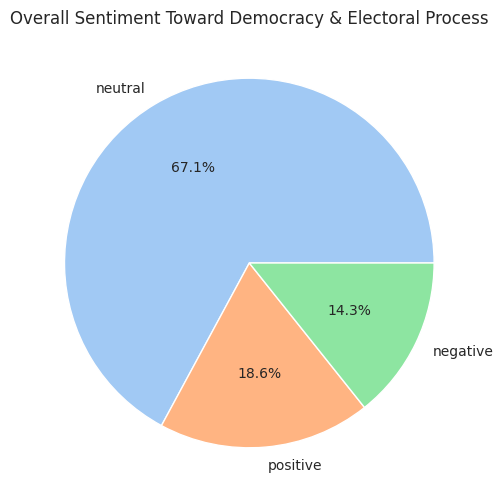

In [ ]:
df['date_only'] = df['date'].dt.date

# Define keywords for "Electoral Process/Democracy"
system_keywords = [
    'democracy', 'election', 'process', 'vote', 'voting', 'ballot',
    'commission', 'ec', 'electoral', 'system', 'rights', 'freedom',
    'fair', 'rigged', 'transparency', 'poll', "bobi", "protest", "seveni", "sevo"
]

def filter_topic(text, keywords):
    if not isinstance(text, str): return False
    text = text.lower()
    return any(word in text for word in keywords)

# Filter for relevant posts
system_df = df[df['clean_text'].apply(lambda x: filter_topic(x, system_keywords))]

# Calculate Sentiment Distribution
overall_sentiment = system_df['sentiment'].value_counts(normalize=True) * 100

# Visualization: Overall Sentiment Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(overall_sentiment, labels=overall_sentiment.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Overall Sentiment Toward Democracy & Electoral Process')

## sentiment overtime

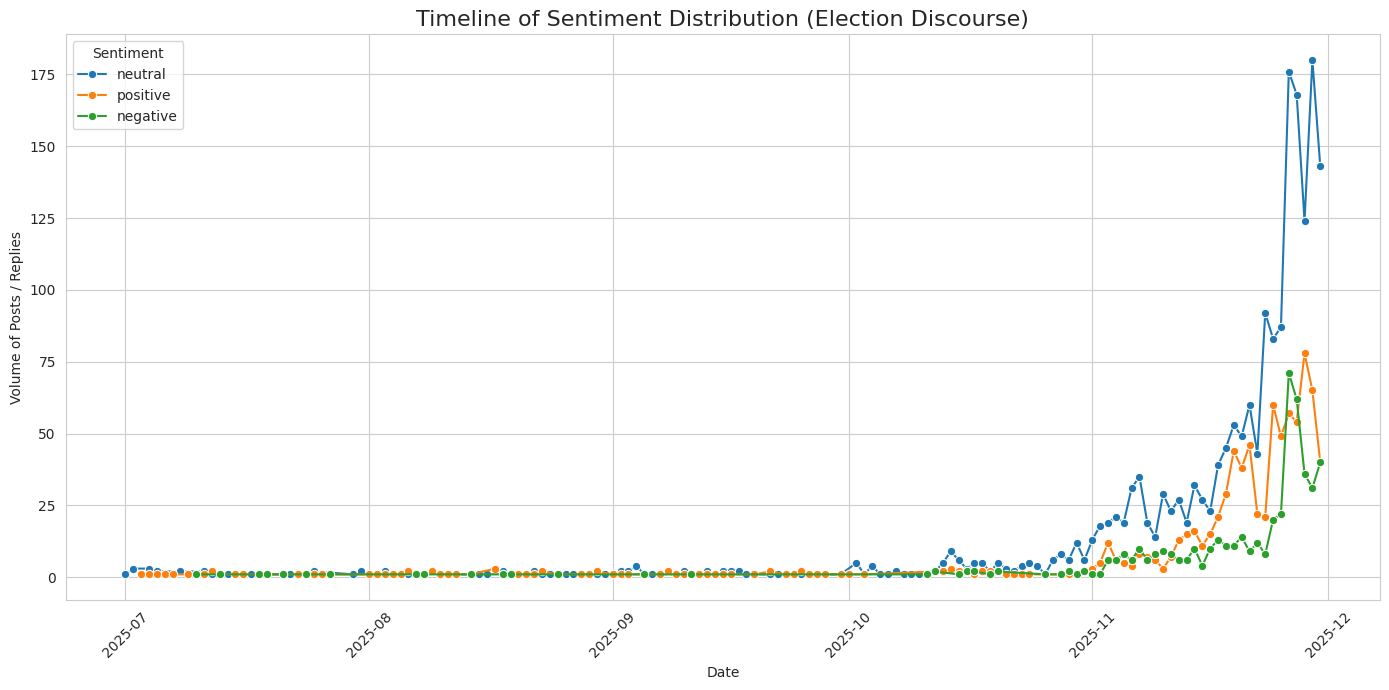

In [ ]:
# Group sentiment counts per day
daily_sentiment = (
    df.groupby(['date_only', 'sentiment'])
      .size()
      .reset_index(name='count')
)

# Visualization: Line Chart
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=daily_sentiment,
    x='date_only',
    y='count',
    hue='sentiment',
    marker='o',
    palette='tab10'
)

plt.title('Timeline of Sentiment Distribution (Election Discourse)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Volume of Posts / Replies')
plt.legend(title='Sentiment', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()


### Emotion distribution overtime

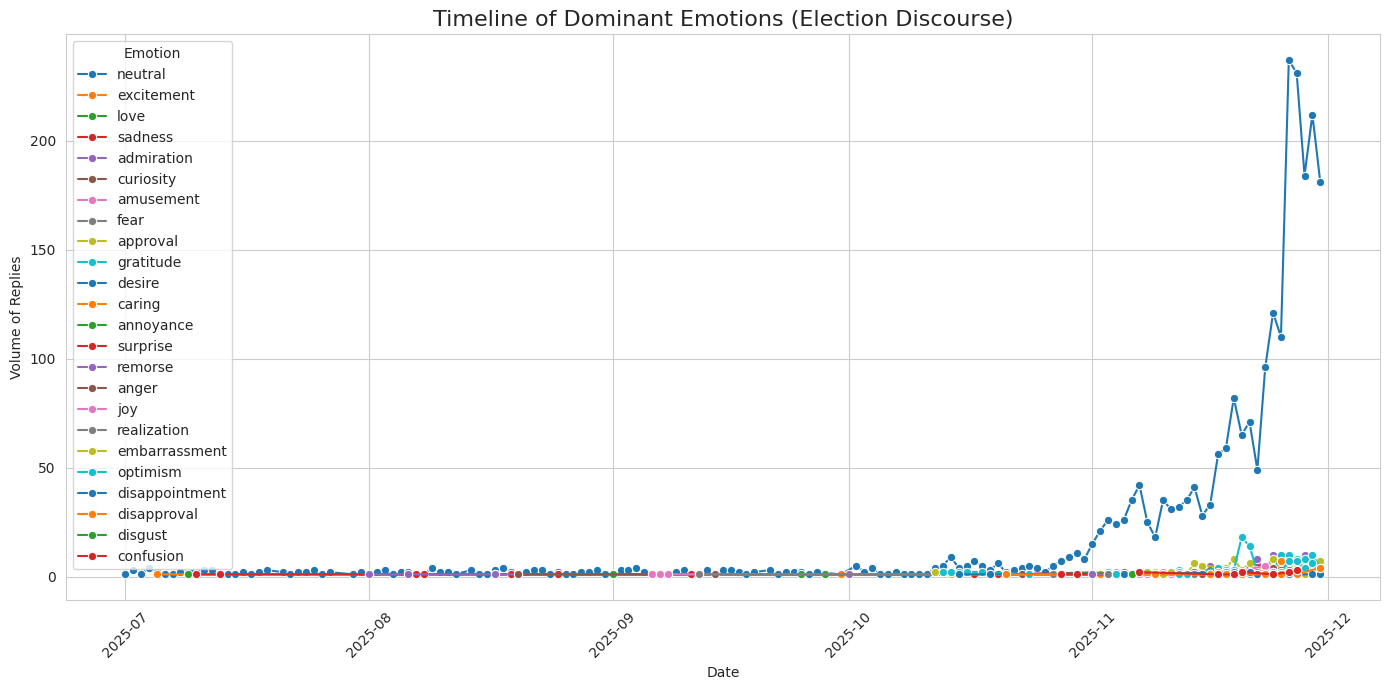

In [ ]:
daily_emotions = df.groupby(['date_only', 'emotion reply']).size().reset_index(name='count')

# Visualization: Line Chart
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_emotions, x='date_only', y='count', hue='emotion reply', marker='o', palette='tab10')
plt.title('Timeline of Dominant Emotions (Election Discourse)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Volume of Replies')
plt.legend(title='Emotion', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

### Overall Dominant Sentiments ?



/tmp/ipython-input-2435246778.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_dist.index, y=sentiment_dist.values, palette='viridis')


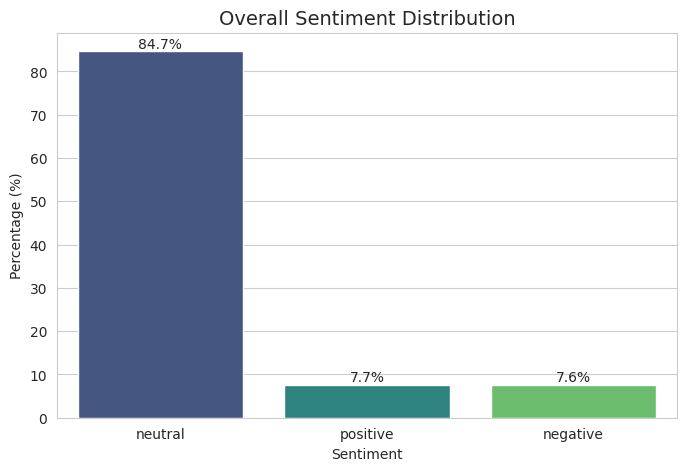

In [ ]:
sentiment_dist = df['sentiment'].value_counts(normalize=True) * 100

# Visualization: Bar Chart
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=sentiment_dist.index, y=sentiment_dist.values, palette='viridis')
plt.title('Overall Sentiment Distribution', fontsize=14)
plt.ylabel('Percentage (%)')
plt.xlabel('Sentiment')

# Add labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')


##

## Is sentiment toward candidates different from sentiment toward the electoral system itself?


In [ ]:
df.columns

Index(['url', 'error', 'errorDescription', 'facebookUrl', 'postId', 'pageName',
       'time', 'timestamp', 'user', 'text', 'textReferences', 'likes',
       'shares', 'topReactionsCount', 'isVideo', 'viewsCount', 'media',
       'feedbackId', 'topLevelUrl', 'facebookId', 'pageAdLibrary', 'inputUrl',
       'comments', 'sharedPost', 'link', 'actionLink', 'previewTitle',
       'previewDescription', 'previewTarget', 'previewSource', 'text en',
       'sentiment_score', 'emotion reply', 'emotion_score', 'author name',
       'date', 'date_only', 'post_type', 'total_engagement', 'hashtags',
       'mention_NUP', 'mention_NRM', 'mention_FDC', 'mention_PDP',
       'mention_DP', 'clean_text', 'focus_category', 'extracted_hashtags',
       'sentiment'],
      dtype='object')

In [ ]:
# Candidate keywords
candidate_keywords = {
    "bobi wine": [r"\bbobi\b", r"\bbobi wine\b", r"\bkyagulanyi\b"],
    "yoweri museveni": [r"\bmuseveni\b", r"\bm7\b", r"\byoweri\b"],
    "mugisha muntu": [r"\bmugisha muntu\b", r"\bmuntu\b"],
    "kasibante robert": [r"\bkasibante\b", r"\brobert kasibante\b"]
}

# Electoral system keywords
system_keywords = [
    r"\belectoral commission\b",
    r"\bec\b",
    r"\bcommission\b",
    r"\belections?\b",
    r"\bvoting\b",
    r"\bballot\b",
    r"\bresults?\b",
    r"\bconstitution\b",
    r"\bdemocracy\b",
    r"\bvote rigging\b",
    r"\bfraud\b"
]


In [ ]:
def contains_keywords(text, patterns):
    if pd.isna(text):
        return False
    text = text.lower()
    return any(re.search(p, text) for p in patterns)


In [ ]:
# Candidate-focused
df["is_candidate_post"] = df["clean_text"].apply(
    lambda x: any(
        contains_keywords(x, patterns)
        for patterns in candidate_keywords.values()
    )
)

# Electoral-system-focused
df["is_system_post"] = df["clean_text"].apply(
    lambda x: contains_keywords(x, system_keywords)
)


In [ ]:
# remove overlap if you want pure comparisons only
df_pure = df[
    (df["is_candidate_post"] ^ df["is_system_post"])
].copy()


In [ ]:
# Define focus label
df_viz = df_pure.copy()

df_viz["focus"] = None
df_viz.loc[df_viz["is_candidate_post"], "focus"] = "Candidates"
df_viz.loc[df_viz["is_system_post"], "focus"] = "Electoral System"

# Keep only pure-focus posts
df_viz = df_viz[df_viz["focus"].notna()]
df_viz = df_viz[~(df_viz["is_candidate_post"] & df_viz["is_system_post"])]


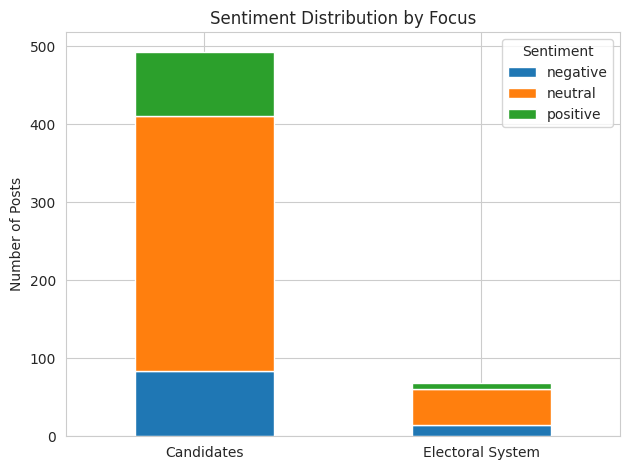

In [ ]:
sentiment_dist = (
    df_viz
    .groupby(["focus", "sentiment"])
    .size()
    .unstack(fill_value=0)
)

sentiment_dist.plot(kind="bar", stacked=True)
plt.title("Sentiment Distribution by Focus")
plt.ylabel("Number of Posts")
plt.xlabel("")
plt.xticks(rotation=0)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()


## candidate level sentiment comparison

In [ ]:
def identify_candidate(text):
    if pd.isna(text):
        return None
    text = text.lower()
    for candidate, patterns in candidate_keywords.items():
        if any(re.search(p, text) for p in patterns):
            return candidate
    return None

In [ ]:
df_candidates = df_pure[df_pure["is_candidate_post"]].copy()
df_candidates["candidate"] = df_candidates["clean_text"].apply(identify_candidate)

In [ ]:
sentiment_counts = (
    df_candidates
    .groupby(["candidate", "sentiment"])
    .size()
    .unstack(fill_value=0)
)

<Figure size 640x480 with 0 Axes>

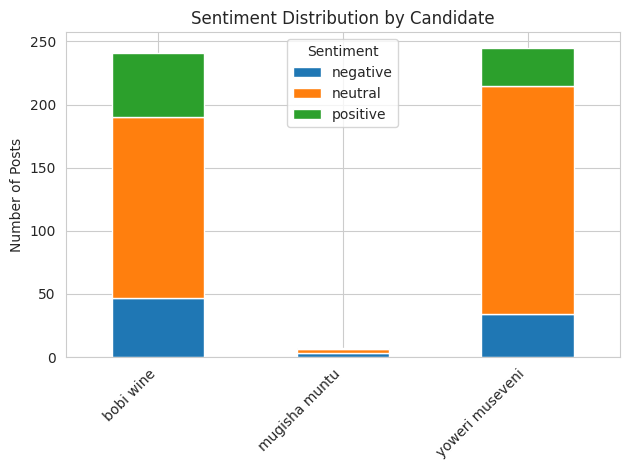

In [ ]:
plt.figure()
sentiment_counts.plot(kind="bar", stacked=True)
plt.title("Sentiment Distribution by Candidate")
plt.ylabel("Number of Posts")
plt.xlabel("")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()
